In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
# Default plot parameters
font = {'weight' : 'normal',
        'size'   : 20}

rc('font', **font)
legend_fs = 16

N = 5
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.gnuplot2(np.linspace(0,1,N)))
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams['image.cmap'] = 'inferno'


<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:3: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:27: SyntaxWarning: invalid escape sequence '\m'
<>:30: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:3: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:27: SyntaxWarning: invalid escape sequence '\m'
<>:30: SyntaxWarning: invalid escape sequence '\m'
C:\Users\lucas\AppData\Local\Temp\ipykernel_25444\2317829025.py:1: SyntaxWarning: invalid escape sequence '\A'
  filenames = ["Raw_data\AFM_waferA_bulk.txt",
C:\Users\lucas\AppData\Local\Temp\ipykernel_25444\2317829025.py:2: SyntaxWarning: invalid escape sequence '\A'
  "Raw_data\AFM_waferA_membrane.txt",
C:\Users\lucas\AppData\Local\Temp\ipykernel_25444\2317829025.py:3: SyntaxWarning: invalid

RMS roughness:
Wafer A - bulk = 	2.1 nm
Wafer A - membrane = 	2.0 nm
Wafer B - bulk = 	4.8 nm
Wafer B - membrane = 	5.6 nm


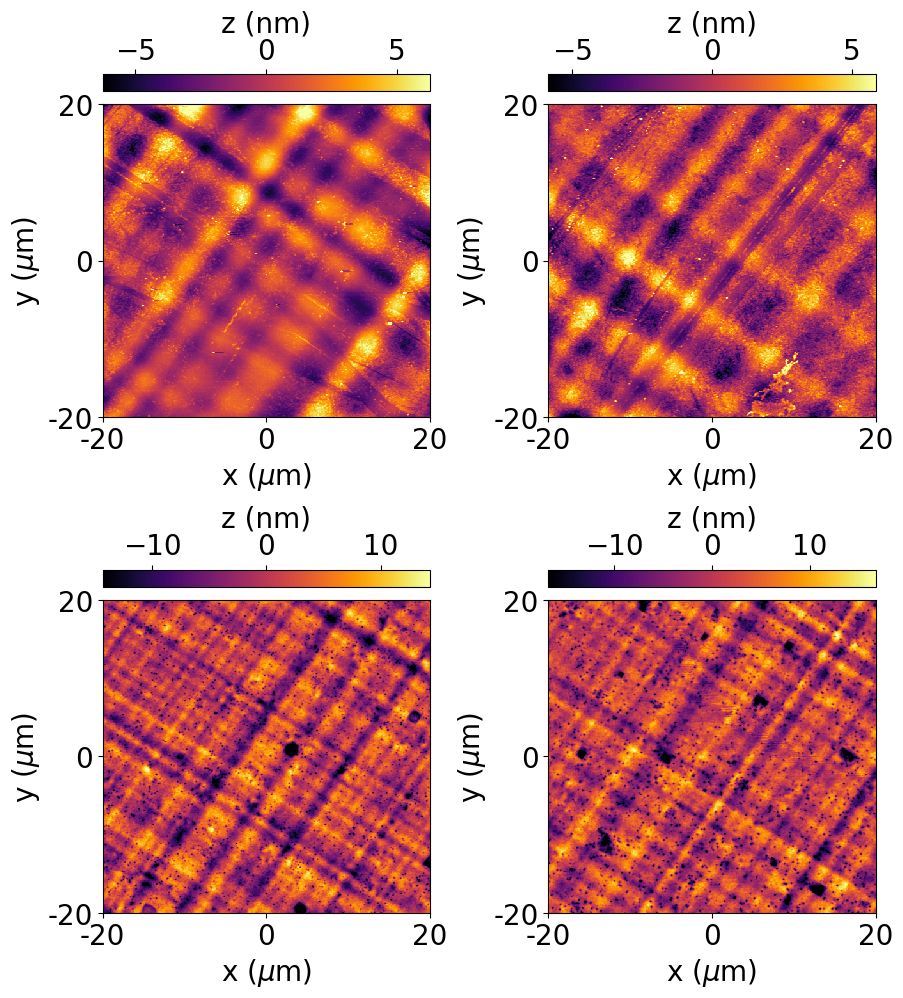

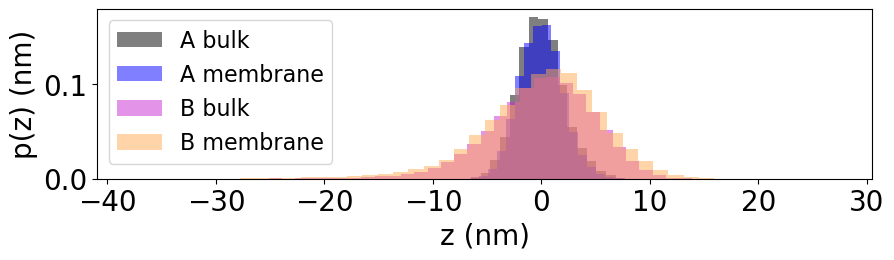

In [4]:
filenames = ["Raw_data\AFM_waferA_bulk.txt",
             "Raw_data\AFM_waferA_membrane.txt", 
             "Raw_data\AFM_waferB_bulk.txt",
             "Raw_data\AFM_waferB_membrane.txt"]
samples = ["Wafer A - bulk", "Wafer A - membrane", "Wafer B - bulk", "Wafer B - membrane"]

fig_afm, ax_afm = plt.subplots(2,2, figsize=(9,10))
ax_afm = ax_afm.flatten()

fig_afm_hist, ax_afm_hist = plt.subplots(figsize=(10,2.2))
bins = 40
rms_roughness = []

for ii,filename in enumerate(filenames):
    data = 1e9*np.flipud(np.loadtxt(filename, skiprows=4))
    data -= np.mean(data)       # Zero mean
    num_pts = np.size(data,0)
    scan_lims = 40.0            # 40x40 um2 scan

    c_lim = 3*np.std(data)
    afm_plot = ax_afm[ii].pcolormesh(data, vmin=-c_lim, vmax=c_lim)
    afm_plot.set_rasterized(True)
    plt.rcParams['svg.fonttype'] = 'none'

    ax_afm[ii].set_xticks([0,num_pts/2,num_pts])
    ax_afm[ii].set_xticklabels([int(-scan_lims/2),0,int(scan_lims/2)])
    ax_afm[ii].set_xlabel('x ($\mu$m)')
    ax_afm[ii].set_yticks([0,num_pts/2,num_pts])
    ax_afm[ii].set_yticklabels([int(-scan_lims/2),0,int(scan_lims/2)])
    ax_afm[ii].set_ylabel('y ($\mu$m)')
    cbar = fig_afm.colorbar(afm_plot, pad=0.035, ax=ax_afm[ii],
                        orientation='horizontal', 
                        location='top'
                        )
    cbar.ax.set_xlabel('z (nm)')
    rms_roughness.append(np.std(data))      # Root mean square roughness

    # Histograms
    total_count = np.size(data)
    ax_afm_hist.hist(data.reshape(total_count), bins=bins, 
                     weights=np.ones(total_count) / total_count,
                     alpha = 0.5
    )

ax_afm_hist.set_xlabel('z (nm)')
ax_afm_hist.set_ylabel('p(z) (nm)')
ax_afm_hist.legend(['A bulk', 'A membrane', 'B bulk', 'B membrane'], loc='upper left', fontsize=legend_fs)

fig_afm.tight_layout(pad=0.3)

print(f"RMS roughness:\n{samples[0]} = \t{rms_roughness[0]:.1f} nm\n{samples[1]} = \t{rms_roughness[1]:.1f} nm\n{samples[2]} = \t{rms_roughness[2]:.1f} nm\n{samples[3]} = \t{rms_roughness[3]:.1f} nm")